In [158]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import math
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from matplotlib.pyplot import figure

/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_1364/653870862.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [131]:
df=pd.read_csv("Data/FoodBalanceSheets_E_All_Data/FoodBalanceSheets_E_All_Data_NOFLAG.csv", encoding="latin-1")

In [132]:
df.drop(["Area Code","Item Code","Element Code"],axis=1,inplace=True)
df

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,Population,Total Population - Both sexes,1000 persons,29186.00,30117.00,31161.00,32270.00,33371.00,34414.00,35383.00,36296.00,37172.00,38042.00
1,Afghanistan,Population,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,2170.00,2152.00,2159.00,2196.00,2265.00,2250.00,2228.00,2303.00,2270.00,2273.00
3,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,59.23,58.00,57.82,57.71,60.17,58.45,58.46,59.50,57.62,57.31
4,Afghanistan,Grand Total,Fat supply quantity (g/capita/day),g/capita/day,36.69,34.81,36.53,37.10,41.48,38.28,40.70,40.03,41.46,39.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319738,Net Food Importing Developing Countries,Miscellaneous,Food,1000 tonnes,787.00,839.00,921.00,935.00,958.00,992.00,1032.00,1066.00,1140.00,1199.00
319739,Net Food Importing Developing Countries,Miscellaneous,Food supply quantity (kg/capita/yr),kg,0.62,0.65,0.68,0.67,0.67,0.68,0.69,0.70,0.73,0.75
319740,Net Food Importing Developing Countries,Miscellaneous,Food supply (kcal/capita/day),kcal/capita/day,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
319741,Net Food Importing Developing Countries,Miscellaneous,Protein supply quantity (g/capita/day),g/capita/day,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [133]:
df.dropna(axis=0, inplace=True)

In [134]:
df=df.loc[~(df.iloc[:,4:]==0).all(axis=1)]

In [135]:
df.Area.value_counts()[40:80]

Italy                                                   1144
Australia                                               1142
Thailand                                                1138
Middle Africa                                           1132
France                                                  1131
Japan                                                   1125
Central Asia                                            1122
Malaysia                                                1119
United Arab Emirates                                    1119
Netherlands                                             1117
Germany                                                 1115
Belgium                                                 1114
Poland                                                  1107
China, Taiwan Province of                               1105
Austria                                                 1102
Turkey                                                  1098
United Kingdom of Great 

In [136]:
df.Item.value_counts()[:30]

Milk - Excluding Butter       5280
Eggs                          4586
Miscellaneous                 3556
Cereals - Excluding Beer      3243
Oilcrops                      3075
Starchy Roots                 2964
Wheat and products            2802
Fruits - Excluding Wine       2801
Maize and products            2796
Potatoes and products         2686
Rice and products             2685
Vegetables                    2648
Pulses                        2611
Vegetables, other             2596
Vegetable Oils                2582
Fruits, other                 2543
Animal fats                   2419
Meat                          2412
Fish, Seafood                 2407
Sugar & Sweeteners            2300
Pulses, Other and products    2281
Oilcrops Oil, Other           2233
Stimulants                    2226
Fats, Animals, Raw            2210
Poultry Meat                  2193
Alcoholic Beverages           2184
Barley and products           2182
Pelagic Fish                  2170
Oranges, Mandarines 

In [137]:
df.Element.unique()

array(['Total Population - Both sexes', 'Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Production',
       'Import Quantity', 'Stock Variation', 'Export Quantity',
       'Domestic supply quantity', 'Feed', 'Seed', 'Losses', 'Residuals',
       'Food', 'Food supply quantity (kg/capita/yr)', 'Processing',
       'Other uses (non-food)', 'Tourist consumption'], dtype=object)

In [138]:
def select(area,item ):
    data=df[df.Area==area]
    data=data[data['Item'].str.contains(item)]
    return data

In [139]:
data=select("Republic of Korea","Cereals - Ex")
data

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
192620,Republic of Korea,Cereals - Excluding Beer,Production,1000 tonnes,6021.00,5826.00,5604.00,5810.00,5853.00,5976.00,5831.00,5488.00,5419.00,5260.00
192621,Republic of Korea,Cereals - Excluding Beer,Import Quantity,1000 tonnes,13873.00,13641.00,14795.00,14687.00,15118.00,15520.00,15229.00,14741.00,15216.00,16132.00
192622,Republic of Korea,Cereals - Excluding Beer,Stock Variation,1000 tonnes,-564.00,-1575.00,-596.00,-128.00,-222.00,-8.00,-130.00,142.00,-404.00,-260.00
192623,Republic of Korea,Cereals - Excluding Beer,Export Quantity,1000 tonnes,262.00,193.00,200.00,203.00,221.00,247.00,234.00,228.00,286.00,285.00
192624,Republic of Korea,Cereals - Excluding Beer,Domestic supply quantity,1000 tonnes,20196.00,20849.00,20794.00,20423.00,20971.00,21256.00,20956.00,19859.00,20752.00,21367.00
192625,Republic of Korea,Cereals - Excluding Beer,Feed,1000 tonnes,8060.00,8418.00,8699.00,8135.00,9354.00,9320.00,9137.00,8120.00,9103.00,10005.00
192626,Republic of Korea,Cereals - Excluding Beer,Seed,1000 tonnes,48.00,42.00,41.00,40.00,41.00,42.00,41.00,39.00,39.00,39.00
192627,Republic of Korea,Cereals - Excluding Beer,Losses,1000 tonnes,643.00,614.00,568.00,706.00,563.00,574.00,556.00,378.00,416.00,467.00
192628,Republic of Korea,Cereals - Excluding Beer,Processing,1000 tonnes,1588.00,1680.00,1677.00,1676.00,2800.00,3037.00,2930.00,2806.00,2841.00,2847.00
192629,Republic of Korea,Cereals - Excluding Beer,Other uses (non-food),1000 tonnes,417.00,487.00,489.00,313.00,160.00,178.00,236.00,456.00,359.00,295.00


# MEAN-BASED PREDICTION

Calculate the loss value of an upcoming year based on the average of previous losses

In [140]:
# def mean_based(year):
#     try:
#         mean_pred=[]
#         losses=data[data.Element=="Losses"].iloc[0,4:]
#         count=0
#         sum=0
#         for i in losses.index:
#             if i=="Y"+str(year):
#                 break
#             sum=losses[i]+sum
#             count+=1
#         mean_pred=sum/count
#         return mean_pred
#     except:
#         return losses["Y"+str(year)]

def mean_based(year):
    try:
        mean_pred=[]
        losses=data[data.Element=="Losses"].iloc[0,4:]
        count=0
        sum=0
        for i in range(0,3):
            sum+=losses["Y"+str(year-i-1)]
            count+=1
        mean_pred=sum/count
        return mean_pred
    except:
        if year==2010:
            return losses["Y"+str(year)]
        if year==2011:
            return (losses["Y"+str(year-1)])
        if year==2012:
            return (losses["Y"+str(year-1)]+(losses["Y"+str(year-2)]))/2
        if year==2013:
            return (losses["Y"+str(year-1)]+(losses["Y"+str(year-2)])+(losses["Y"+str(year-3)]))/3

In [146]:
def by_average(data):
    mean_based_pred=[]
    losses=pd.DataFrame(data[data.Element=="Losses"].iloc[0,4:])
    losses.columns=["Actual"]
    losses["MeanBasedPred"]=np.zeros([len(losses)])
    for i in losses.index:
        losses["MeanBasedPred"][i]=mean_based(int(i[1:]))
    losses.reset_index()
    MSE = np.square(np.subtract(losses["Actual"].values,losses["MeanBasedPred"].values)).mean() 
    RMSE = math.sqrt(MSE)
    MAPE= np.mean(np.abs((losses["MeanBasedPred"].values - losses["Actual"].values) /losses["Actual"].values))*100
    print("RMSE =",RMSE)
    print("MAPE =",np.mean(np.abs((losses["Actual"].values - losses["MeanBasedPred"].values)/losses["Actual"].values))*100)
    return losses, MSE, RMSE, MAPE

In [147]:
losses,mse_mean,rmse_mean,mape_mean=by_average(data)
mse_mean,rmse_mean,mape_mean

/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_1364/3085655691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses["MeanBasedPred"][i]=mean_based(int(i[1:]))


RMSE = 81.1372807859207
MAPE = 13.19284712644621


(6583.258333333336, 81.1372807859207, 13.19284712644621)

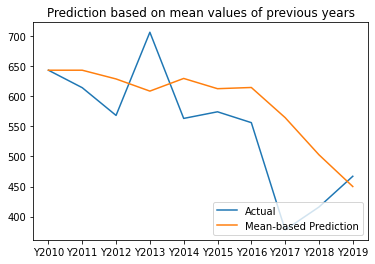

In [148]:
plt.plot(losses.index,losses["Actual"])
plt.plot(losses.index,losses.MeanBasedPred)
plt.title("Prediction based on mean values of previous years")
plt.legend(['Actual', 'Mean-based Prediction'], loc='lower right')

In [150]:
population=df[df["Element"]=="Total Population - Both sexes"]
population=population[population.Area=="China"].iloc[0,4:]*1000
lstm_data=pd.DataFrame(population)
lstm_data.columns=["Population"]
lstm_data["Actual Loss"]=losses["Actual"]

# ARIMA MODEL

predicted=568.068691, expected=556.000000
predicted=565.967195, expected=378.000000
predicted=456.795979, expected=416.000000
predicted=402.145788, expected=467.000000
Test RMSE: 101.671
Test MAPE = 18.897884097490326


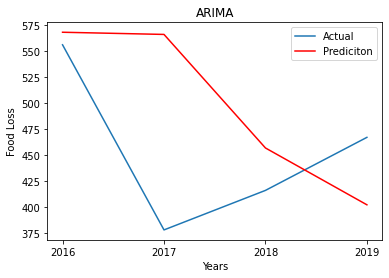

In [152]:
def by_arima(data):
	series=data
	X = series.values
	# size = int(len(X) * 0.66)
	size=6
	train, test = X[0:size], X[size:len(X)]
	history = [x for x in train]
	predictions = list()
	# walk-forward validation
	for t in range(len(test)):
		model = ARIMA(history, order=(1,1,0))
		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		print('predicted=%f, expected=%f' % (yhat, obs))
	# evaluate forecasts
	mape=np.mean(np.abs((test - predictions)/test))*100
	rmse = sqrt(mean_squared_error(test, predictions))
	print('Test RMSE: %.3f' % rmse)
	print("Test MAPE =", mape)
	return rmse,mape
rmse_arima, mape_arima=by_arima(lstm_data["Actual Loss"])
# plot forecasts against actual outcomes
years=['2016','2017','2018','2019']
pyplot.plot(years,test)
pyplot.plot(predictions, color='red')
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.legend(["Actual","Prediciton"])
plt.title("ARIMA")
# plt.ylim(23000,26000)
pyplot.show()

In [153]:
def df_to_X_y(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [154]:
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(lstm_data["Actual Loss"], WINDOW_SIZE)
X1.shape, y1.shape

((7, 3, 1), (7,))

In [155]:
X_train1, y_train1 = X1[:4], y1[:4]
X_val1, y_val1 = X1[4:6], y1[4:6]
X_test1, y_test1 = X1[6:], y1[6:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((4, 3, 1), (4,), (2, 3, 1), (2,), (1, 3, 1), (1,))

Data Scaling

In [156]:
scalers = {}
for i in range(X_train1.shape[1]):
    scalers[i] = StandardScaler()
    X_train1[:, i, :] = scalers[i].fit_transform(X_train1[:, i, :]) 

for i in range(X_test1.shape[1]):
    X_test1[:, i, :] = scalers[i].transform(X_test1[:, i, :]) 

# LSTM MODEL

In [161]:
def by_lstm(X_train1, y_train1,X_val1,y_val1):
    model1 = Sequential()
    model1.add(InputLayer((3, 1)))
    model1.add(LSTM(32))
    model1.add(Dense(8, 'relu'))
    model1.add(Dense(1, 'linear'))

    # model1.summary()

    cp1 = ModelCheckpoint('model1/', save_best_only=True)
    model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[MeanAbsolutePercentageError()])

    model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=200, callbacks=[cp1])
    return model1
model1=by_lstm(X_train1, y_train1, X_val1,y_val1)

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 363497.1250 - mean_absolute_percentage_error: 99.9993

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 19s 19s/step - loss: 363497.1250 - mean_absolute_percentage_error: 99.9993 - val_loss: 1022395.1250 - val_mean_absolute_percentage_error: 255.4633
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 78700.4531 - mean_absolute_percentage_error: 43.8913

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 12s 12s/step - loss: 78700.4531 - mean_absolute_percentage_error: 43.8913 - val_loss: 146941.6719 - val_mean_absolute_percentage_error: 96.4297
Epoch 3/200
1/1 [==============================] - 0s 75ms/step - loss: 292797.6875 - mean_absolute_percentage_error: 91.2765 - val_loss: 408277.1250 - val_mean_absolute_percentage_error: 161.0171
Epoch 4/200
1/1 [==============================] - 0s 64ms/step - loss: 274743.4688 - mean_absolute_percentage_error: 88.5602 - val_loss: 390893.0000 - val_mean_absolute_percentage_error: 157.5438
Epoch 5/200
1/1 [==============================] - ETA: 0s - loss: 330974.3750 - mean_absolute_percentage_error: 95.3267

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 13s 13s/step - loss: 330974.3750 - mean_absolute_percentage_error: 95.3267 - val_loss: 29177.1836 - val_mean_absolute_percentage_error: 42.6276
Epoch 6/200
1/1 [==============================] - ETA: 0s - loss: 321938.5312 - mean_absolute_percentage_error: 93.9878

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 10s 10s/step - loss: 321938.5312 - mean_absolute_percentage_error: 93.9878 - val_loss: 1226.8085 - val_mean_absolute_percentage_error: 7.1992
Epoch 7/200
1/1 [==============================] - 0s 90ms/step - loss: 312409.8125 - mean_absolute_percentage_error: 92.5551 - val_loss: 32762.0820 - val_mean_absolute_percentage_error: 45.2153
Epoch 8/200
1/1 [==============================] - 0s 75ms/step - loss: 302625.4062 - mean_absolute_percentage_error: 91.0607 - val_loss: 181326.3125 - val_mean_absolute_percentage_error: 107.1701
Epoch 9/200
1/1 [==============================] - 0s 56ms/step - loss: 302075.5625 - mean_absolute_percentage_error: 90.5300 - val_loss: 535469.0000 - val_mean_absolute_percentage_error: 184.4531
Epoch 10/200
1/1 [==============================] - 0s 71ms/step - loss: 282795.8125 - mean_absolute_percentage_error: 87.9551 - val_loss: 1155226.5000 - val_mean_absolute_percentage_error: 271.0837
Epoch 11/200
1/1 [=============

In [168]:
# model1 = load_model('model1/')

In [169]:
test_predictions_x=tf.convert_to_tensor(X, dtype=tf.int64)
train_predictions = model1.predict(test_predictions_x).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

ValueError: in user code:

    File "/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_7" (type Sequential).
    
    Input 0 of layer "lstm_4" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_7" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None


In [165]:
mean_absolute_error(y_train1,train_predictions)
print("MAPE =",np.mean(np.abs((y_train1 - train_predictions)/y_train1))*100)

MAPE = 8.478546382439319


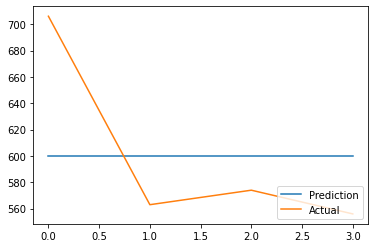

In [166]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])
plt.legend(['Prediction', 'Actual'], loc='lower right')

In [105]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1/1 [==============================] - 0s 19ms/step


,Val Predictions,Actuals
0,597.078186,378.0
1,597.078186,416.0


In [106]:
# plt.plot(val_results['Val Predictions'])
# plt.plot(val_results['Actuals'])

In [107]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

1/1 [==============================] - 0s 17ms/step


,Test Predictions,Actuals
0,597.078186,467.0


dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])


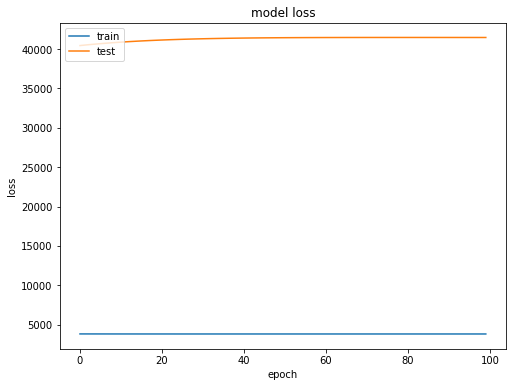

In [108]:
history = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, verbose=0)  #..., callbacks=[cp1], verbose=0)
print(history.history.keys())

figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# GRU MODEL

In [118]:
model3 = Sequential()
model3.add(InputLayer((3, 1)))
model3.add(GRU(64))
model3.add(Dense(50, 'relu'))
model3.add(Dense(50, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanAbsolutePercentageError(), optimizer=Adam(learning_rate=0.1), metrics=[MeanAbsolutePercentageError()])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_12 (Dense)            (None, 50)                3250      
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 18,715
Trainable params: 18,715
Non-trainable params: 0
_________________________________________________________________


In [128]:
history=model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=200, callbacks=[cp3])

Epoch 1/200
1/1 [==============================] - 0s 78ms/step - loss: 6.4526 - mean_absolute_percentage_error: 6.4526 - val_loss: 86.4784 - val_mean_absolute_percentage_error: 86.4784
Epoch 2/200
1/1 [==============================] - 0s 30ms/step - loss: 7.8426 - mean_absolute_percentage_error: 7.8426 - val_loss: 85.0237 - val_mean_absolute_percentage_error: 85.0237
Epoch 3/200
1/1 [==============================] - 0s 31ms/step - loss: 8.2409 - mean_absolute_percentage_error: 8.2409 - val_loss: 84.6030 - val_mean_absolute_percentage_error: 84.6030
Epoch 4/200
1/1 [==============================] - 0s 31ms/step - loss: 7.3199 - mean_absolute_percentage_error: 7.3199 - val_loss: 82.2083 - val_mean_absolute_percentage_error: 82.2083
Epoch 5/200
1/1 [==============================] - 0s 26ms/step - loss: 7.9806 - mean_absolute_percentage_error: 7.9806 - val_loss: 84.3759 - val_mean_absolute_percentage_error: 84.3759
Epoch 6/200
1/1 [==============================] - 0s 24ms/step - loss

In [129]:
# model3 = load_model('model3/')
train_predictions3 = model3.predict(X_train1).flatten()
train_results3 = pd.DataFrame(data={'Train Predictions':train_predictions3, 'Actuals':y_train1})
train_results3

1/1 [==============================] - 0s 16ms/step


,Train Predictions,Actuals
0,719.596558,706.0
1,580.613281,563.0
2,594.383362,574.0
3,588.834900,556.0


Text(0.5, 1.0, 'GRU')

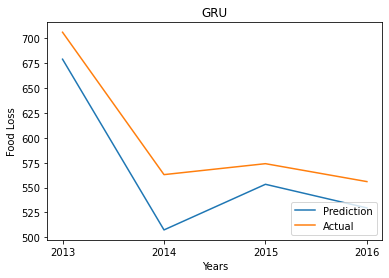

In [123]:
train_results3.index=['2013','2014','2015','2016']
plt.plot(train_results3['Train Predictions'])
plt.plot(train_results3['Actuals'])

plt.legend(['Prediction', 'Actual'], loc='lower right')
# plt.ylim(20000,,30000)
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.title("GRU")
# plt.ylim(20000,28000)

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])


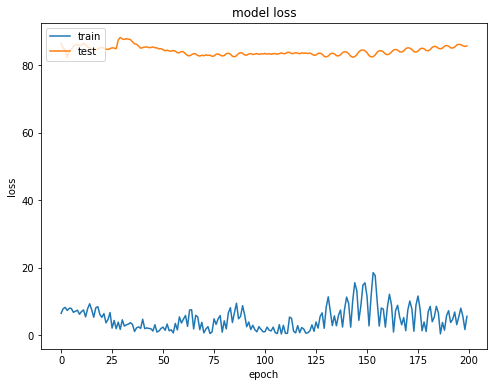

In [130]:
# history = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, verbose=0)
print(history.history.keys())


figure(figsize=(8, 6))
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
val_predictions3 = model3.predict(X_val1).flatten()
val_results3 = pd.DataFrame(data={'Val Predictions':val_predictions3, 'Actuals':y_val1})
val_results3

1/1 [==============================] - 0s 16ms/step


,Val Predictions,Actuals
0,17401.720703,24293.0
1,17401.720703,24021.0


In [201]:
test_predictions3=tf.convert_to_tensor(test_predictions3, dtype=tf.int64)
test_predictions3 = model3.predict(test_predictions3).flatten()
test_results3 = pd.DataFrame(data={'Test Predictions':test_predictions3, 'Actuals':y_test1})
test_results3

NameError: name 'tf' is not defined